In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("Whatsapp_chat.csv")
df.head()

,Unnamed: 0,hours,days,months,names,timestamp
0,0,1,19,May,Person4,2020-05-19
1,1,22,19,May,Person3,2020-05-19
2,2,22,19,May,Person3,2020-05-19
3,3,22,19,May,Person1,2020-05-19
4,4,22,19,May,Person3,2020-05-19


In [18]:
df.drop("Unnamed: 0", axis=1, inplace=True)

<Axes: ylabel='count'>

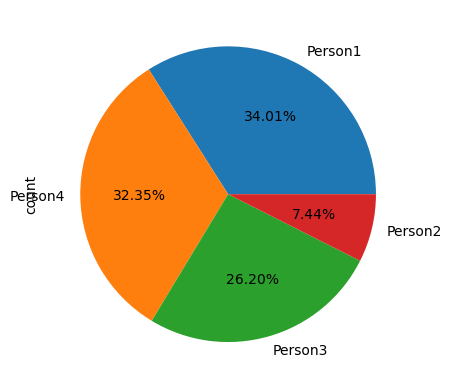

In [19]:
df["names"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='count'>

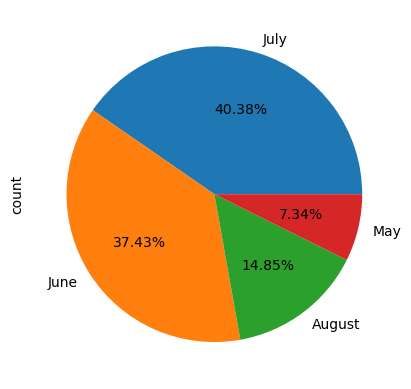

In [20]:
df["months"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [21]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["Day"] = pd.to_datetime(df["timestamp"]).dt.day_name()
df["Month"] = pd.to_datetime(df["timestamp"]).dt.month_name()
df["Year"] = pd.to_datetime(df["timestamp"]).dt.year 

In [22]:
df.head()

,hours,days,months,names,timestamp,Day,Month,Year
0,1,19,May,Person4,2020-05-19,Tuesday,May,2020
1,22,19,May,Person3,2020-05-19,Tuesday,May,2020
2,22,19,May,Person3,2020-05-19,Tuesday,May,2020
3,22,19,May,Person1,2020-05-19,Tuesday,May,2020
4,22,19,May,Person3,2020-05-19,Tuesday,May,2020


<Axes: xlabel='Day', ylabel='count'>

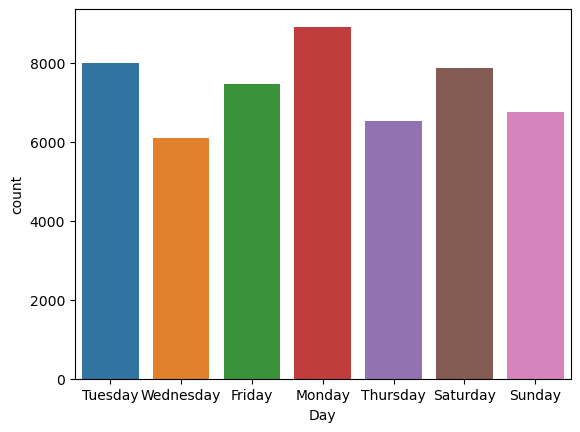

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="Day")

<Axes: xlabel='Month', ylabel='count'>

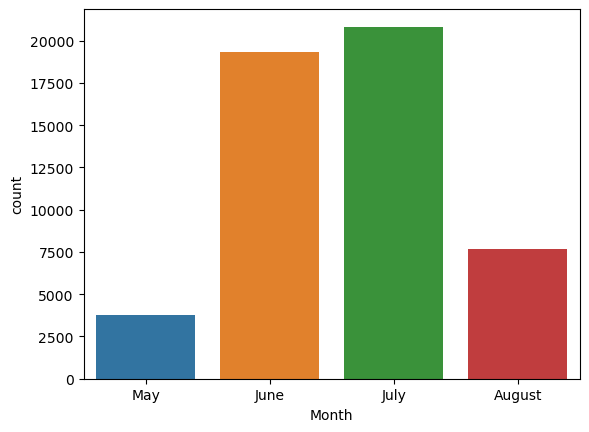

In [24]:
sns.countplot(data=df, x="Month")

<Axes: xlabel='Day', ylabel='count'>

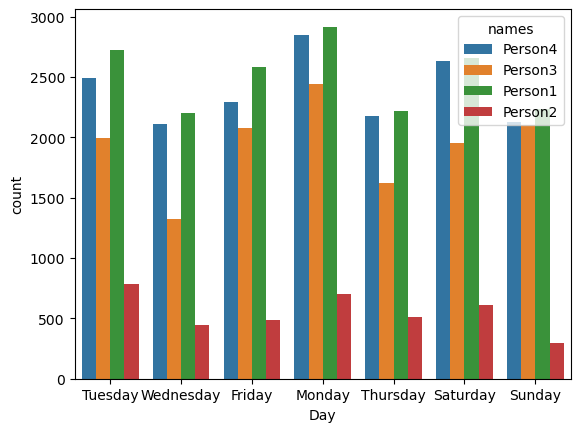

In [26]:
sns.countplot(data=df, x="Day", hue="names")

<Axes: xlabel='Month', ylabel='count'>

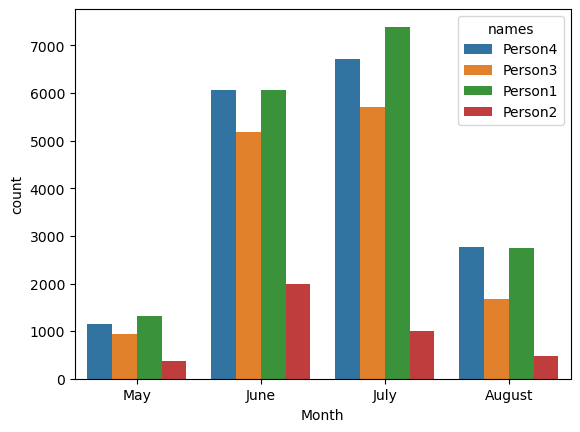

In [27]:
sns.countplot(data=df, x="Month", hue="names")

<Axes: xlabel='hours', ylabel='count'>

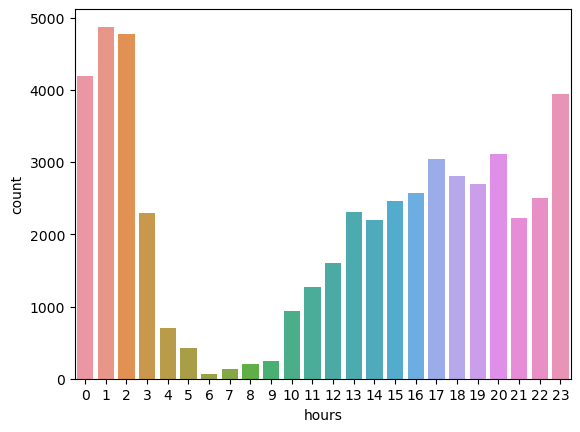

In [29]:
sns.countplot(data=df, x="hours")

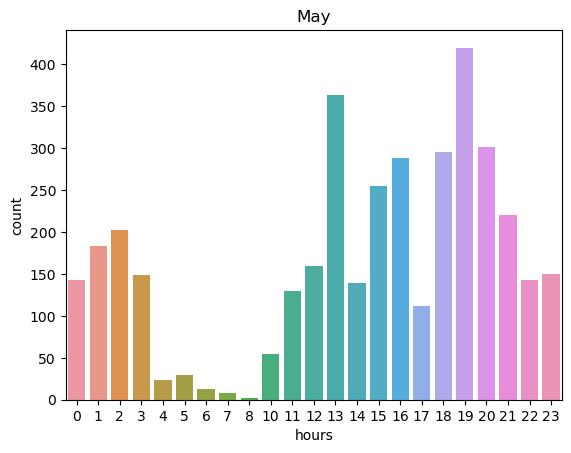

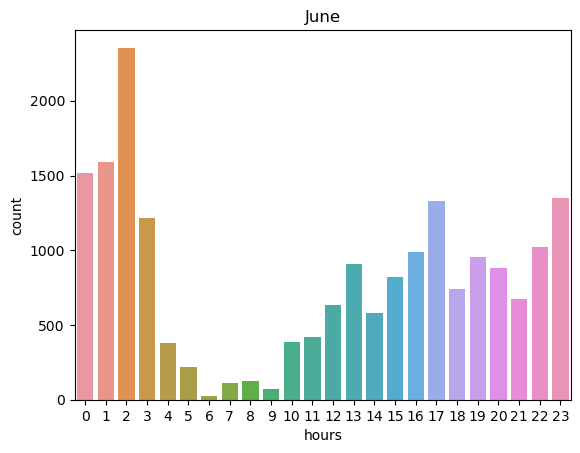

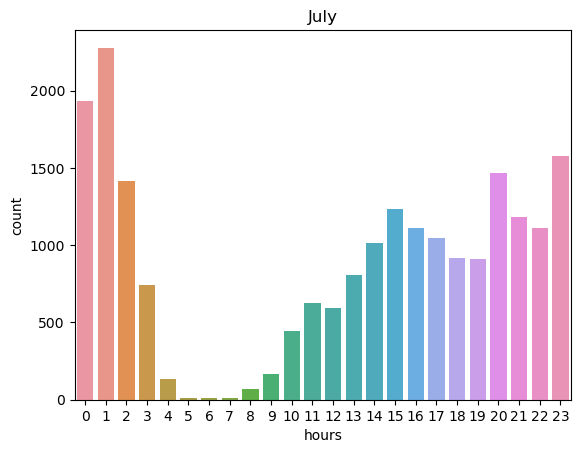

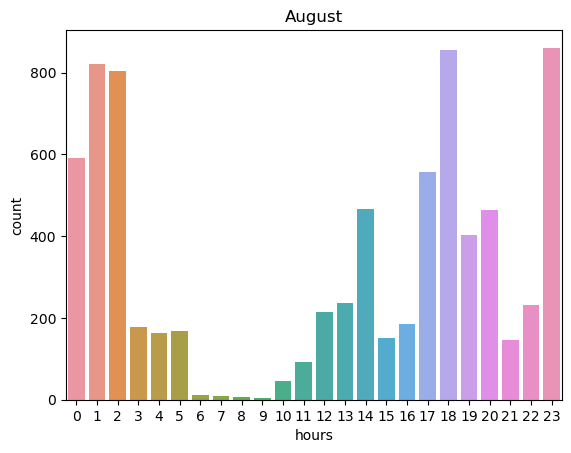

In [30]:
months = df.months.unique()

for month in months:
    plt.figure()
    sns.countplot(data=df[df["Month"] == month], x="hours")
    plt.title(month)
    plt.show()

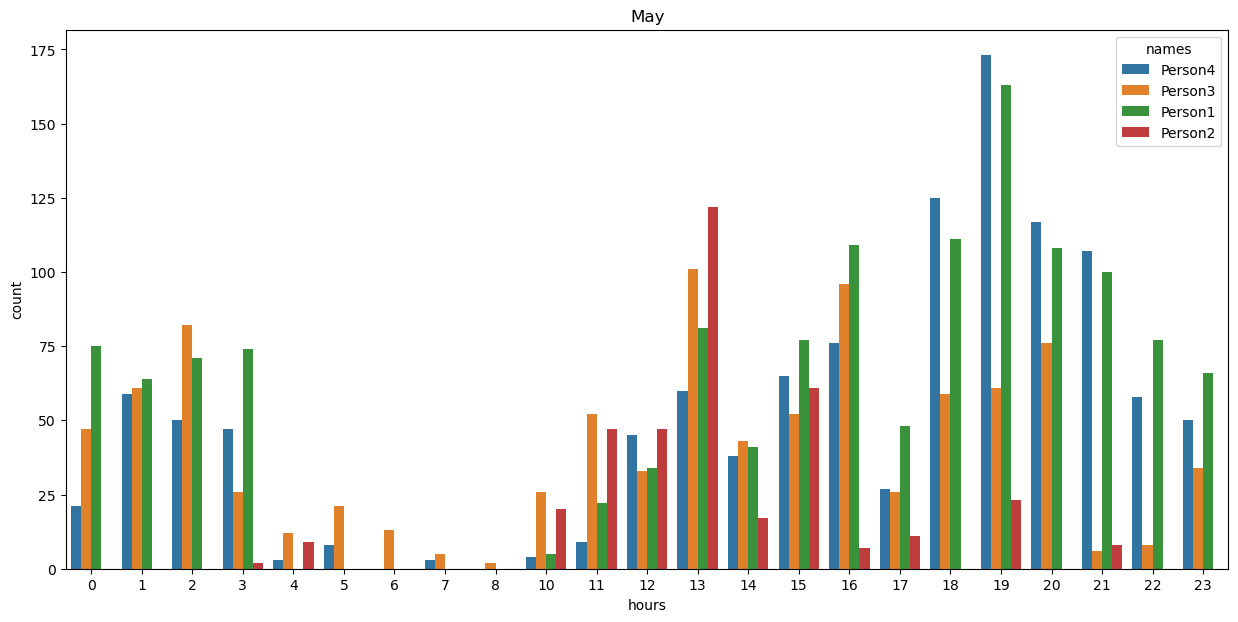

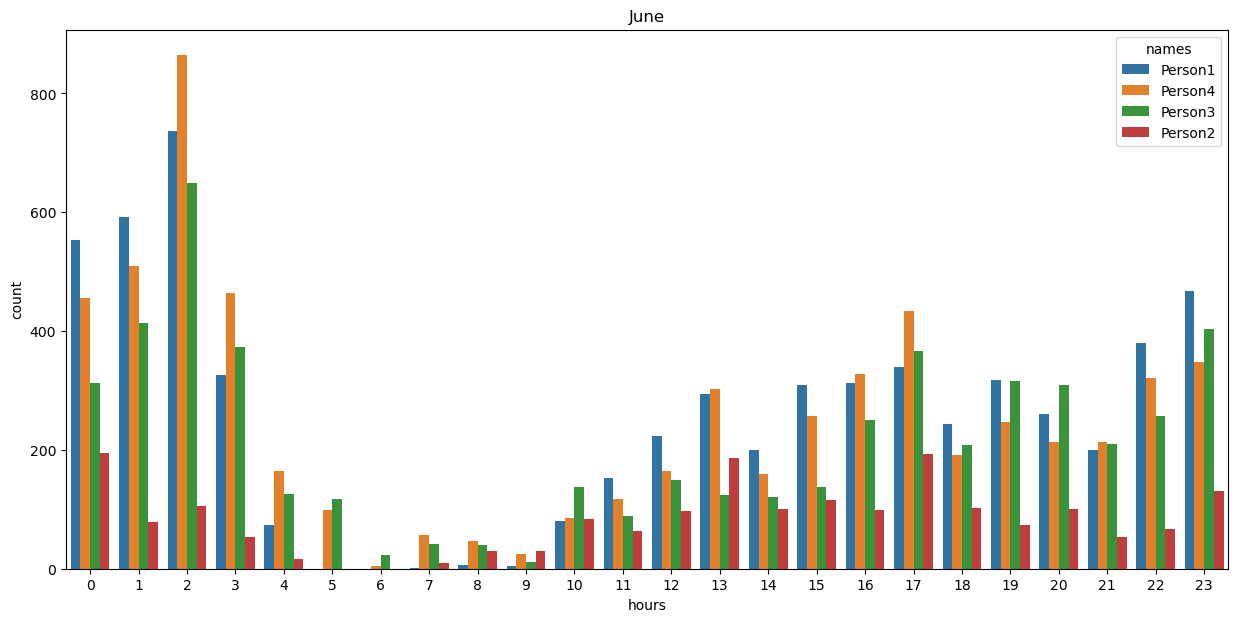

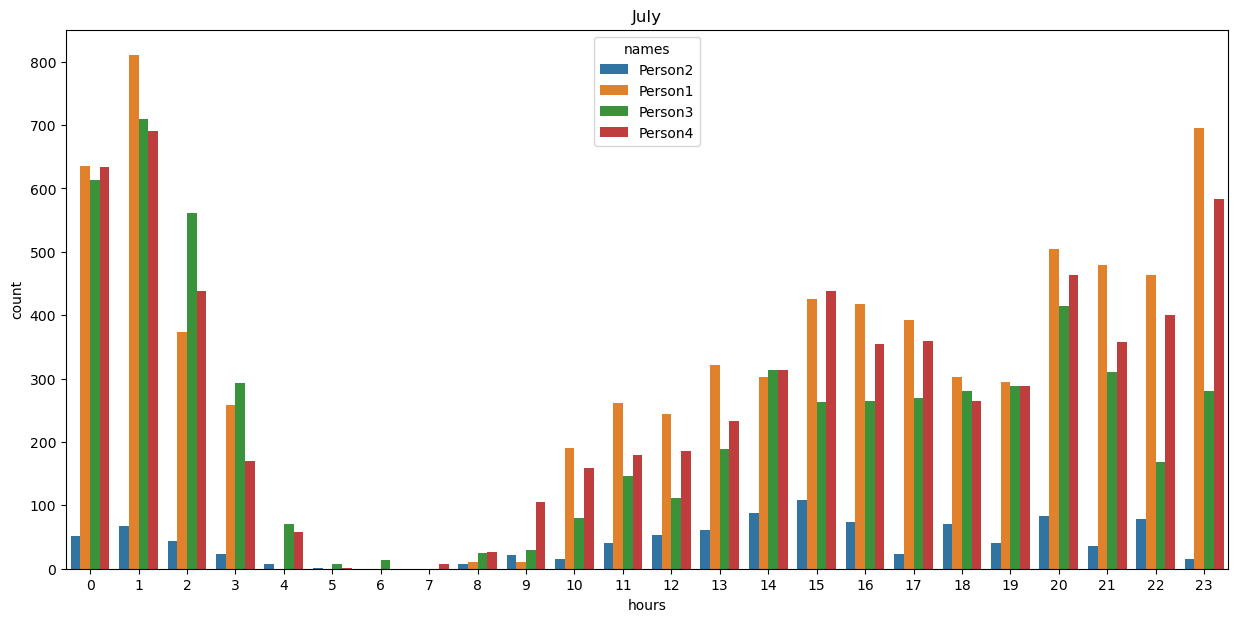

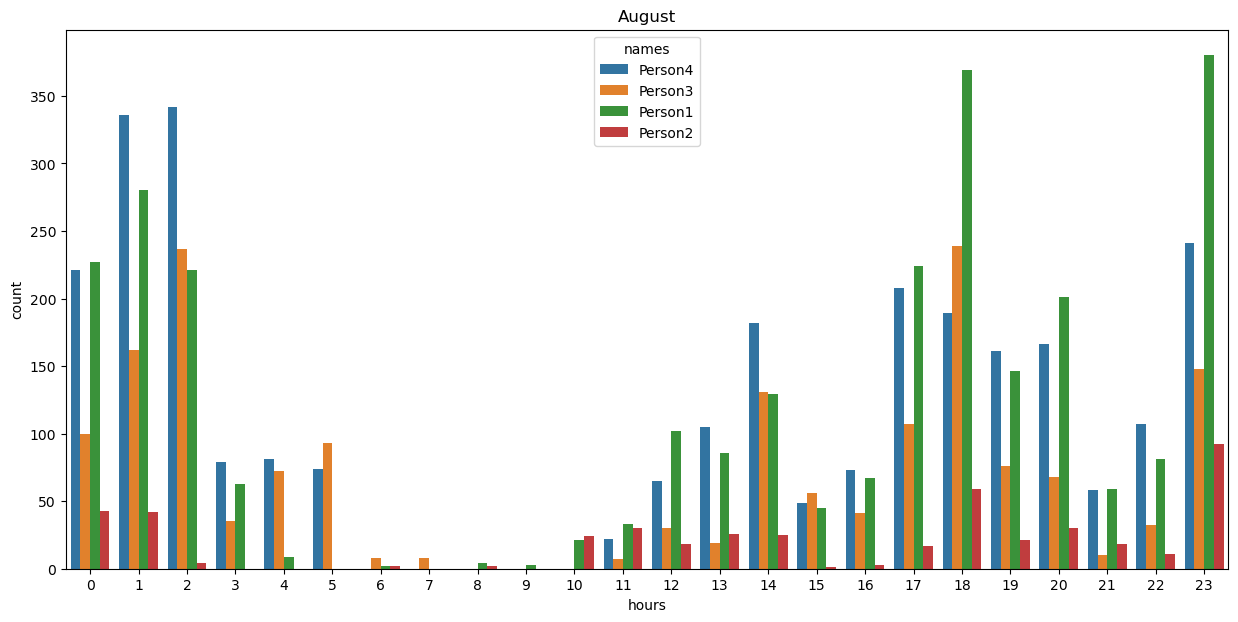

In [32]:
months = df.months.unique()

for month in months:
    plt.figure(figsize=(15, 7))
    sns.countplot(data=df[df["Month"] == month], x="hours", hue="names")
    plt.title(month)
    plt.show()

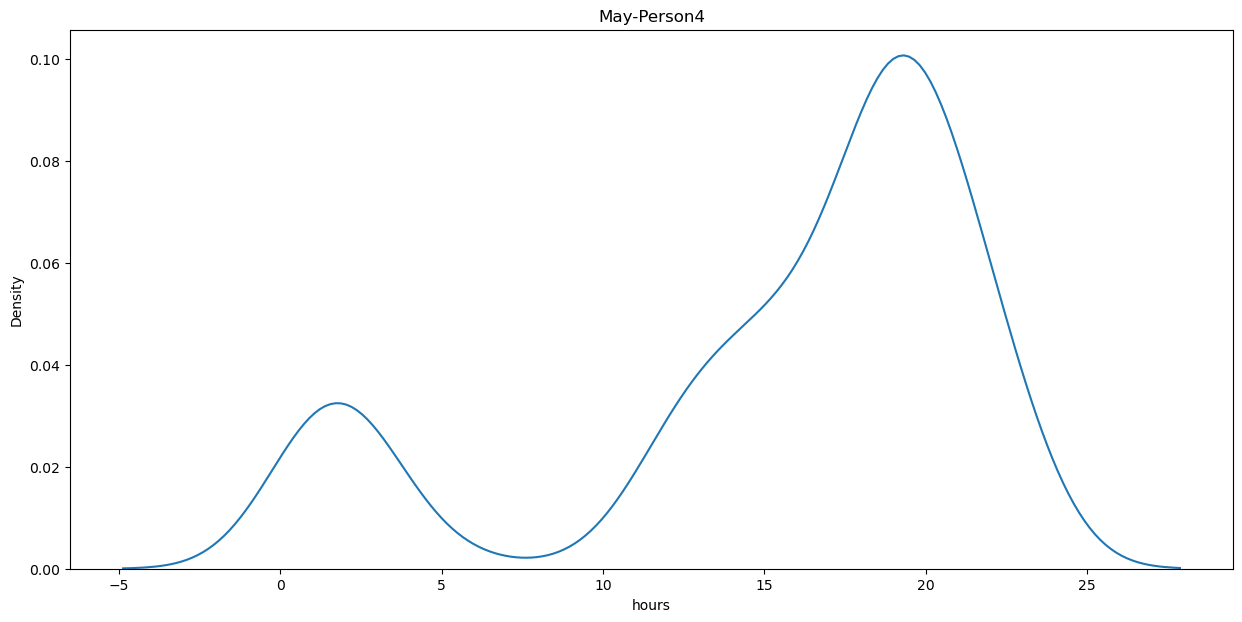

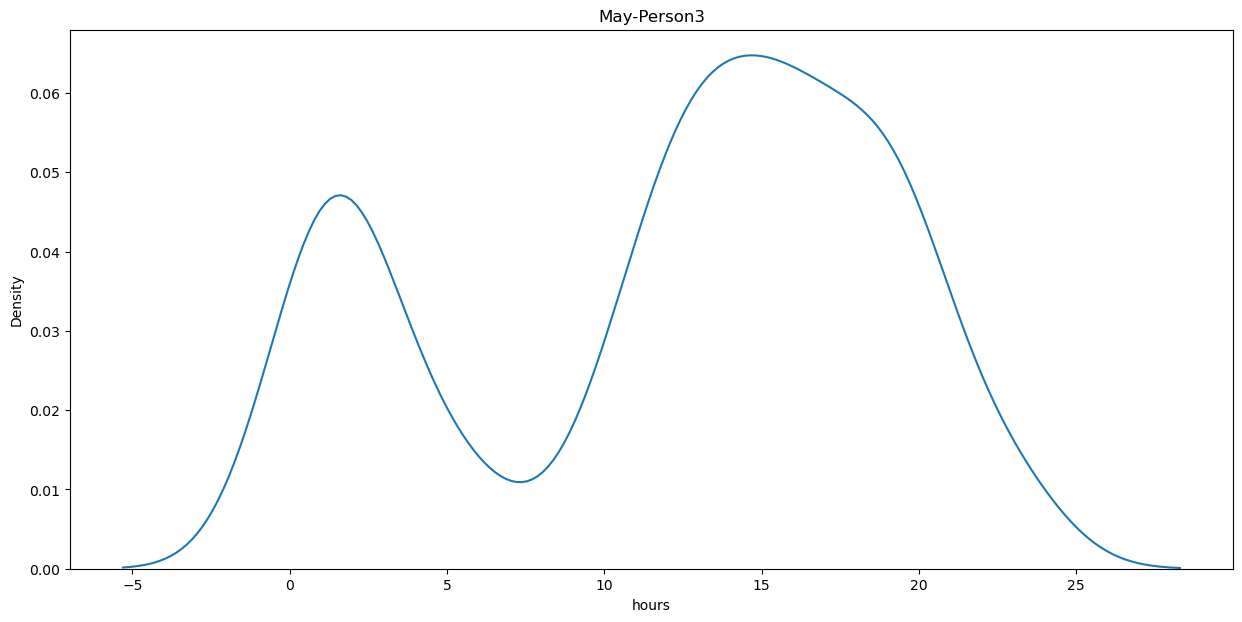

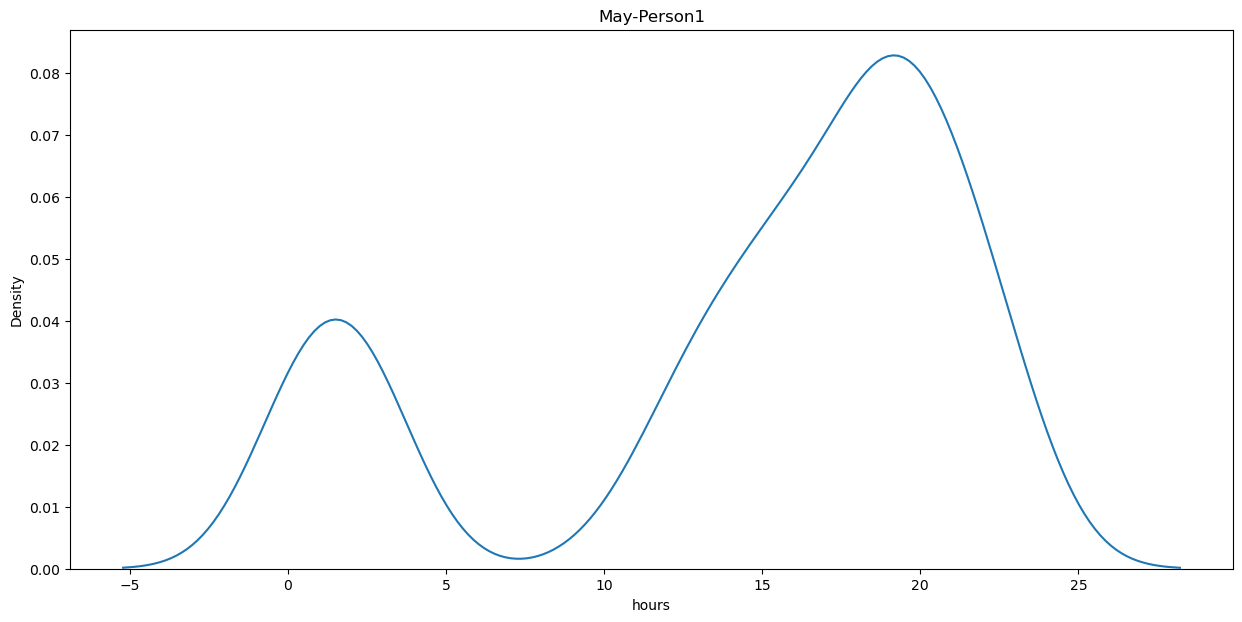

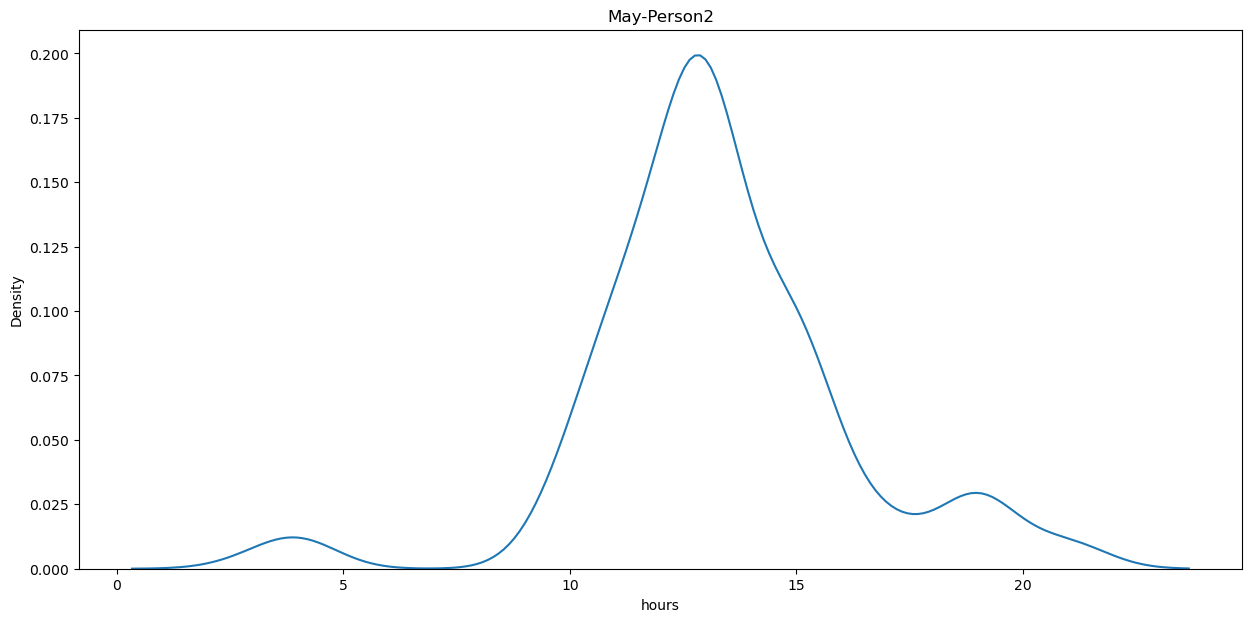

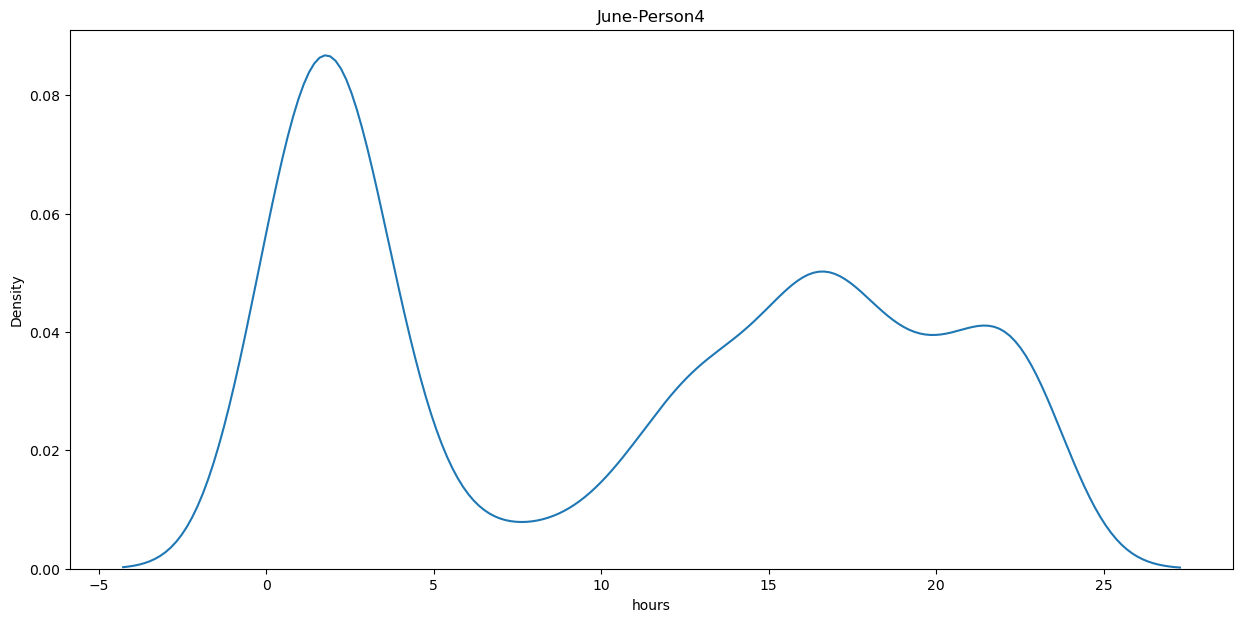

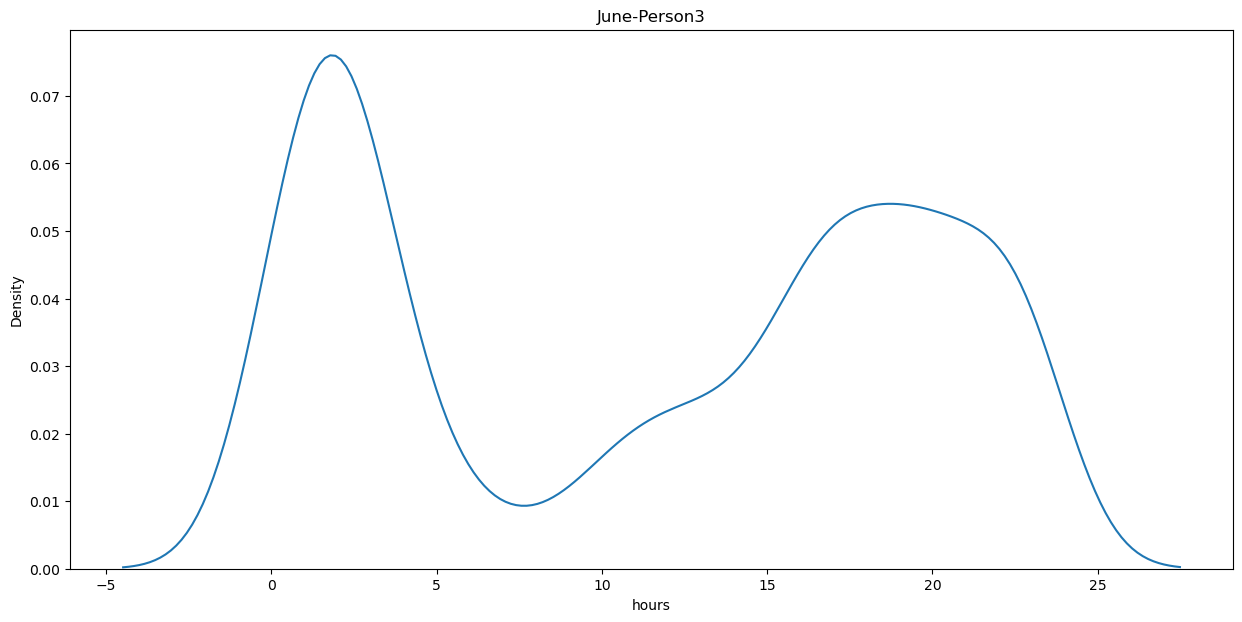

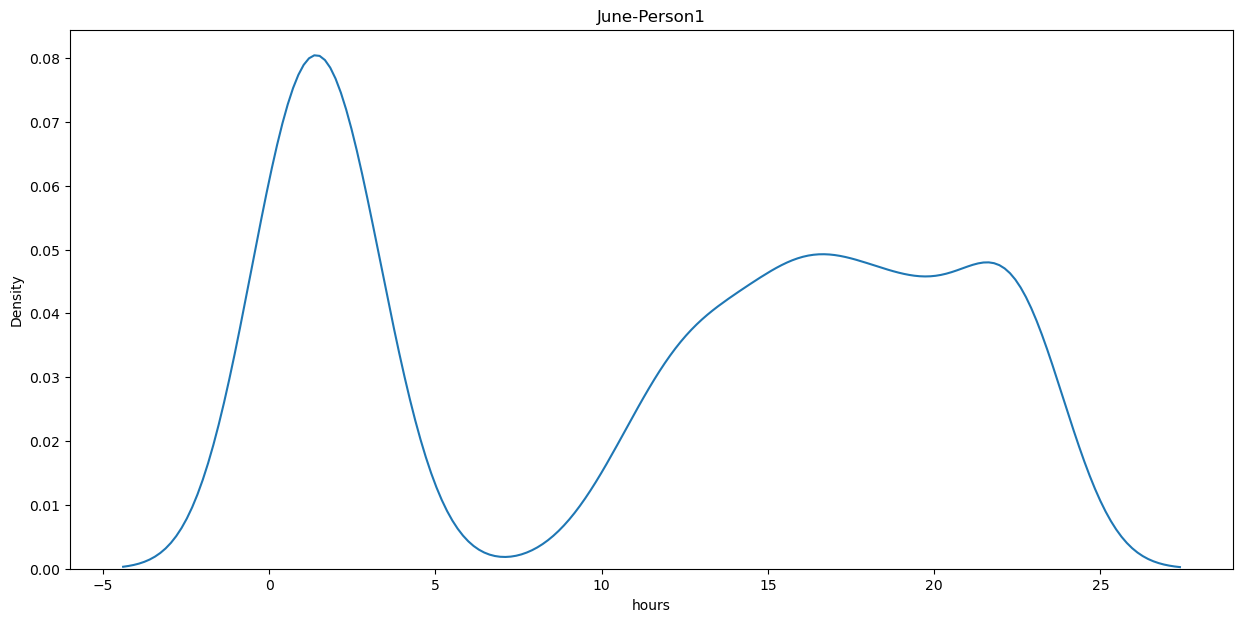

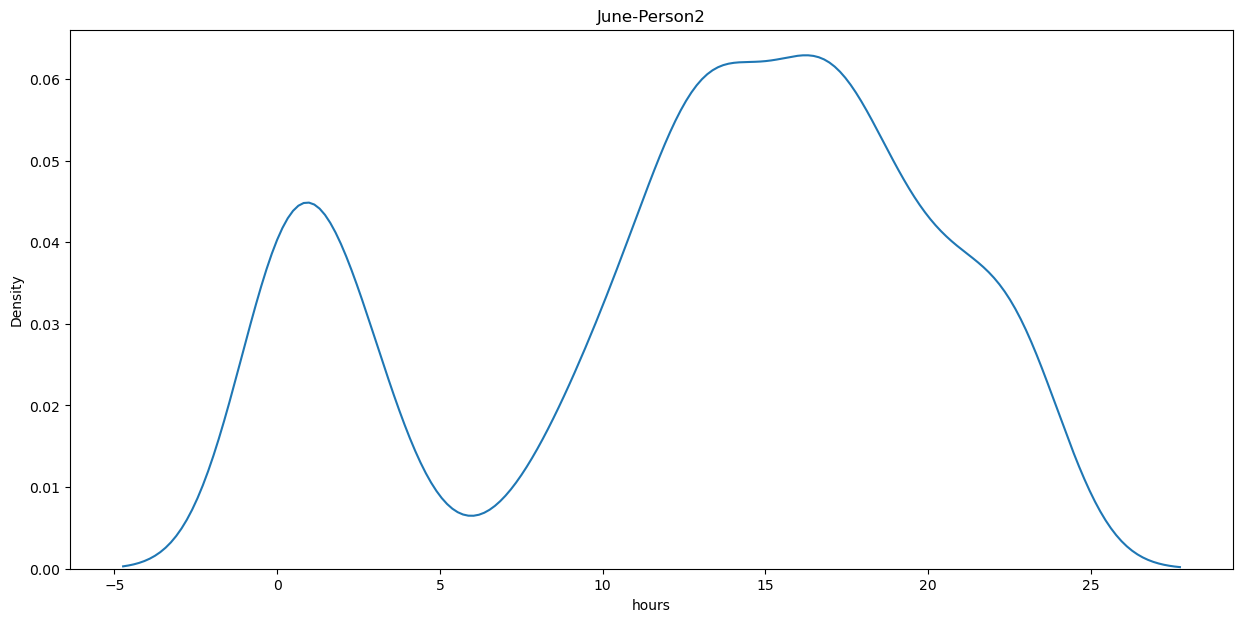

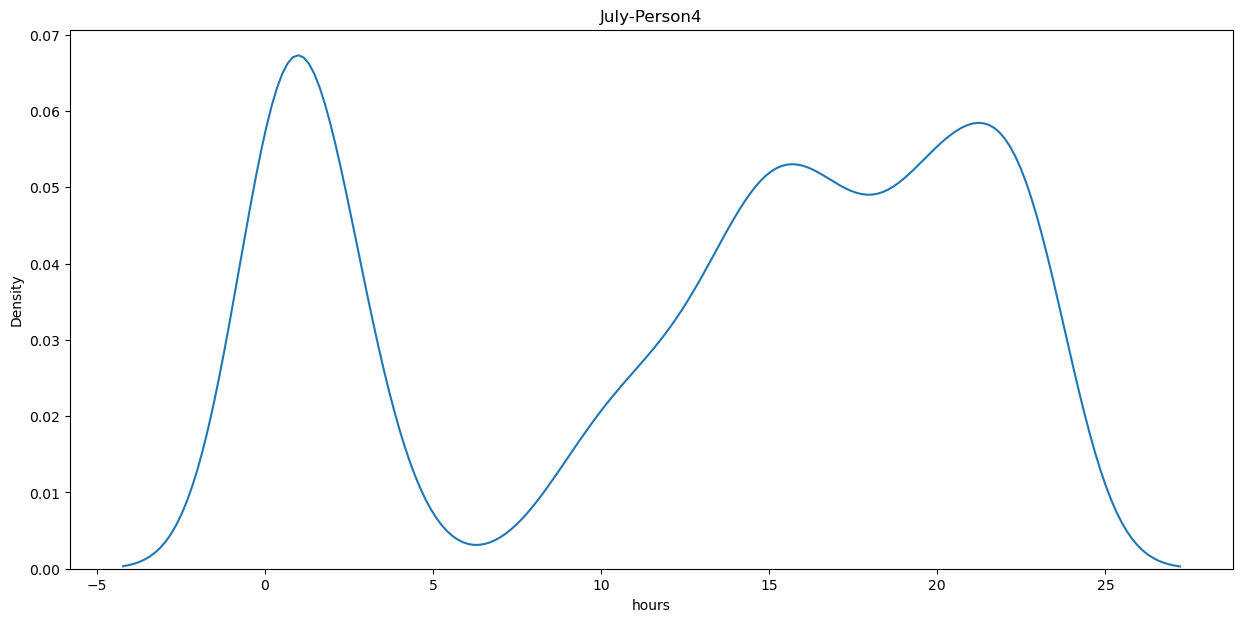

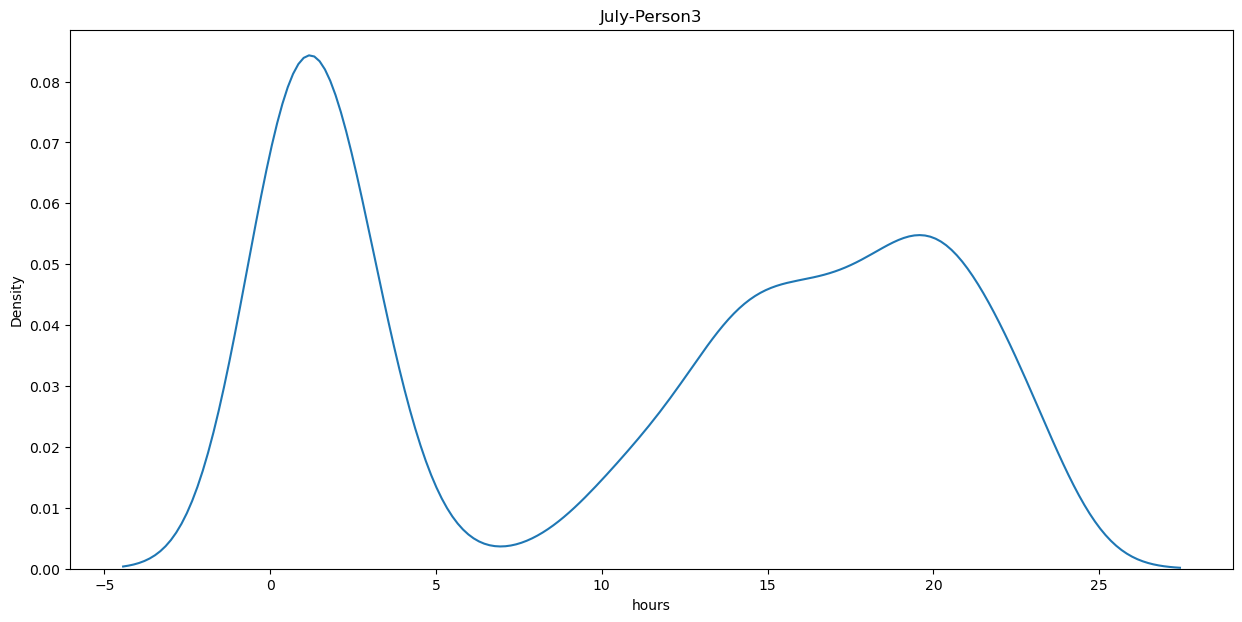

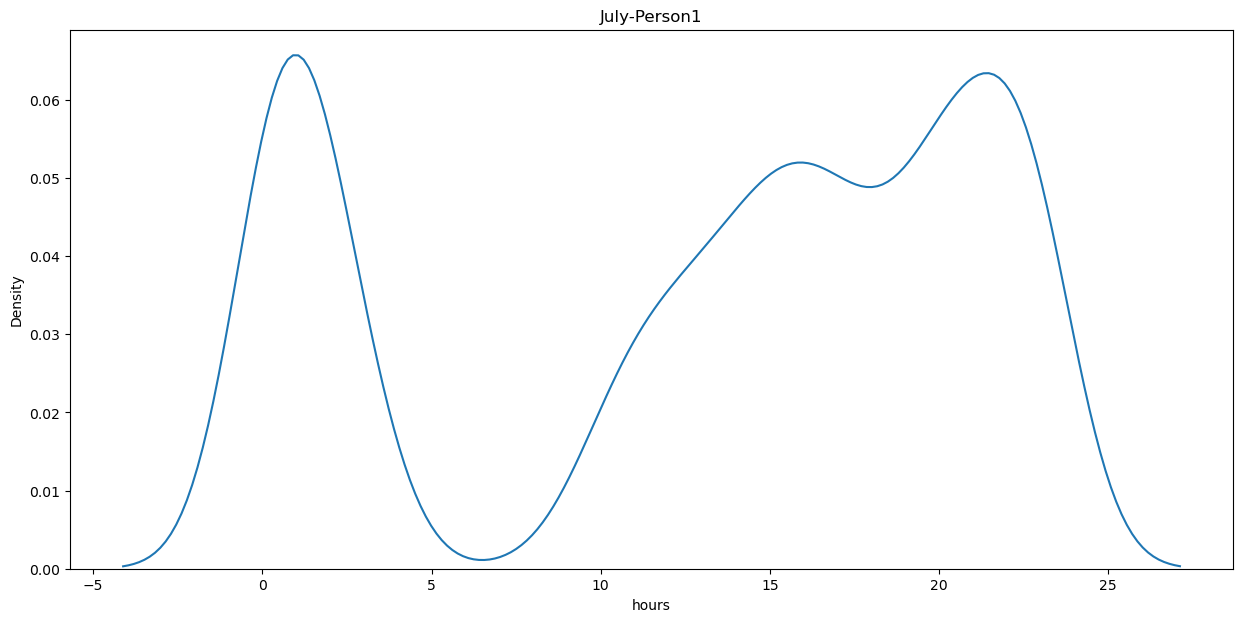

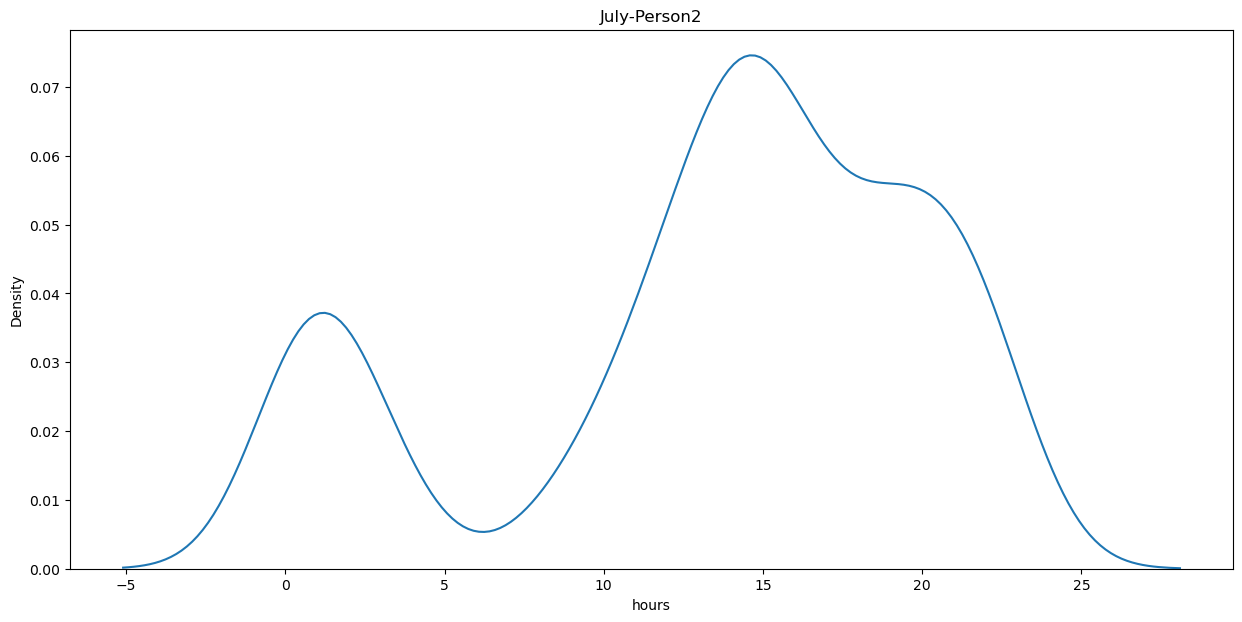

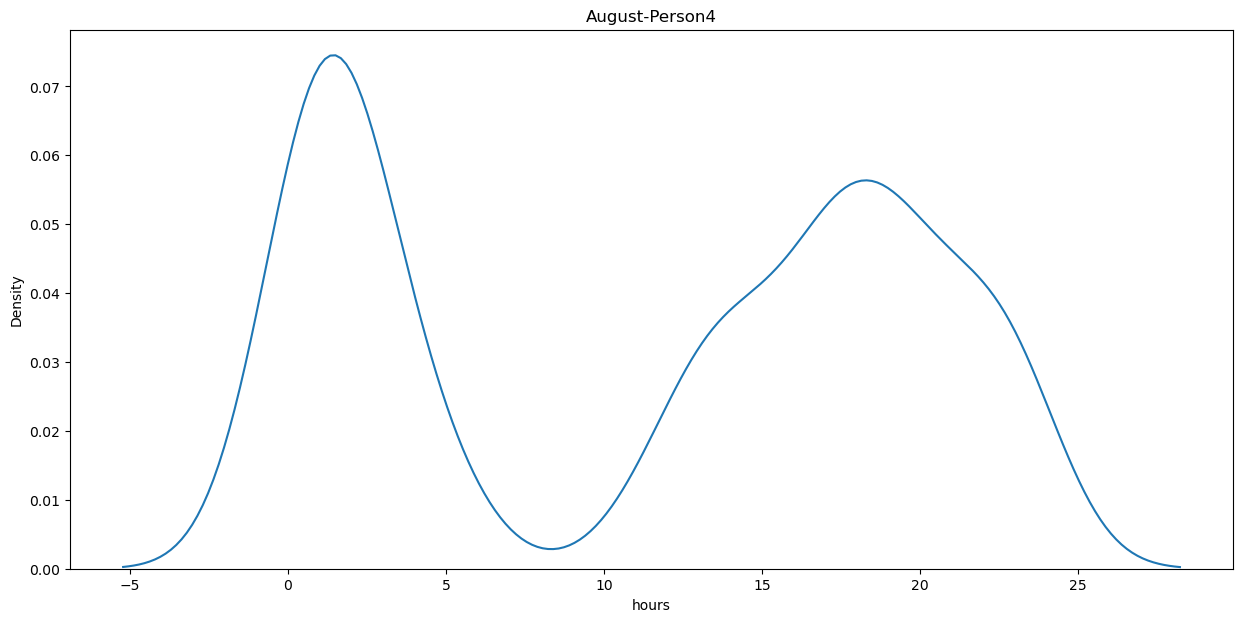

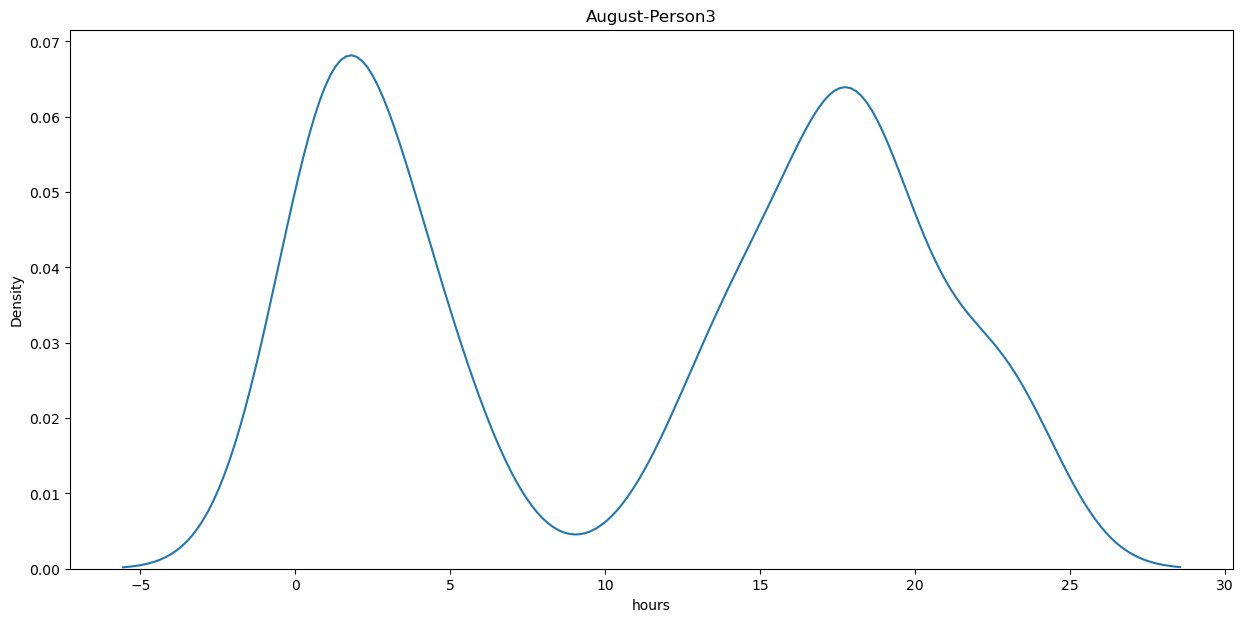

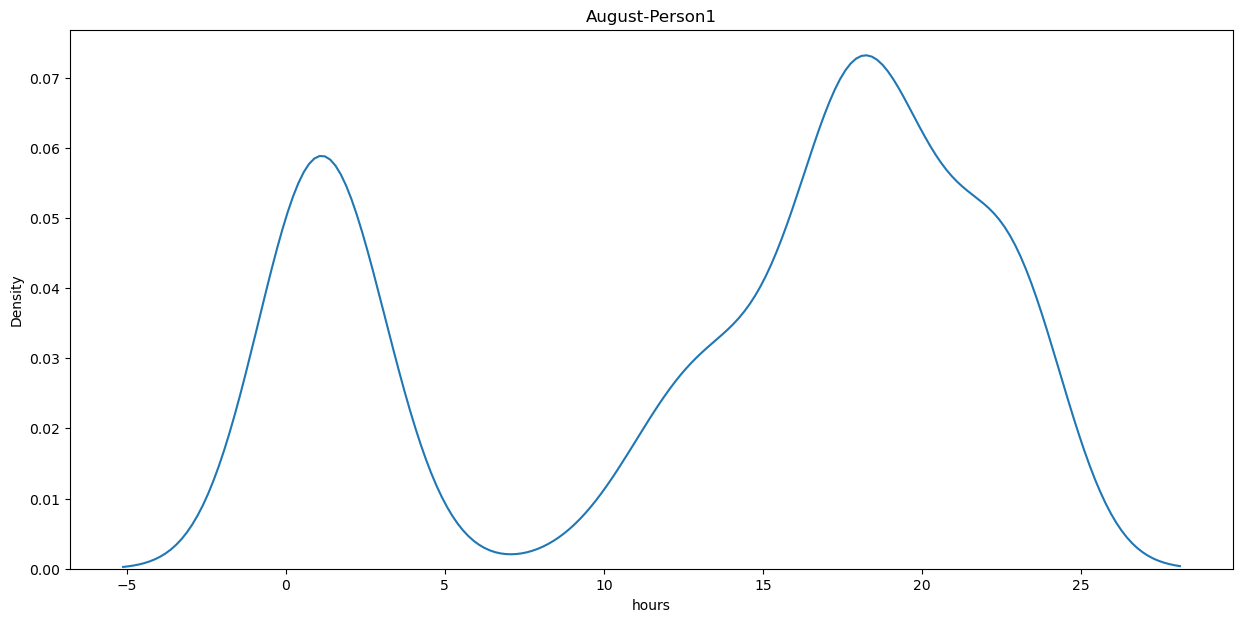

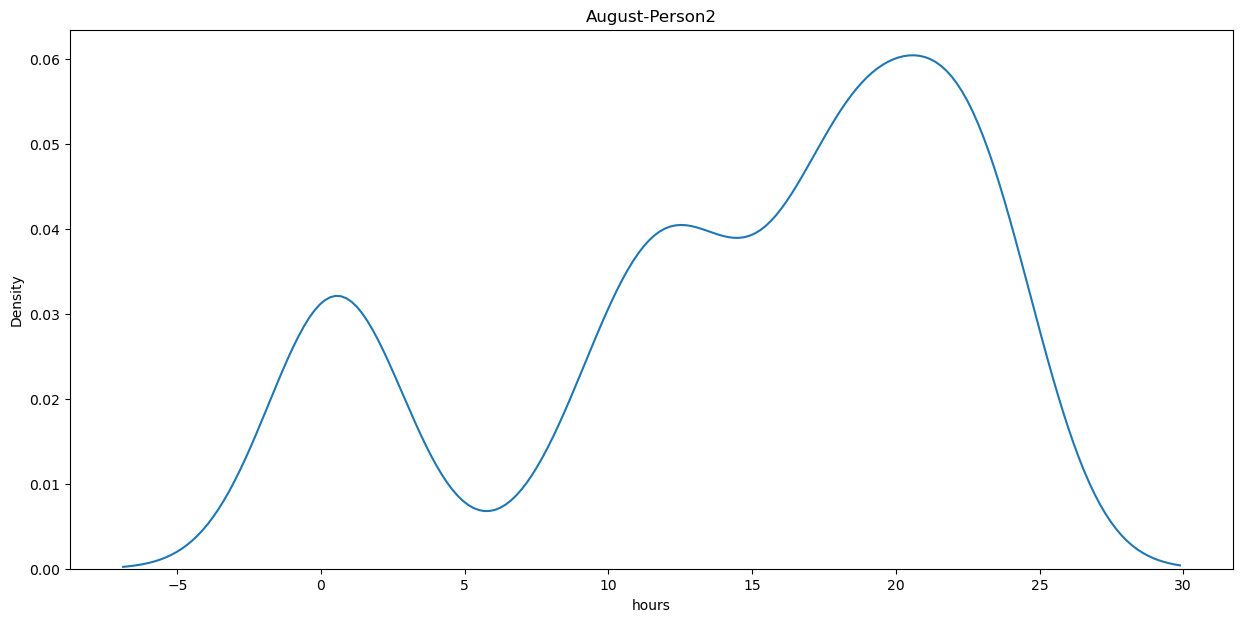

In [34]:
months = df.months.unique()
names = df.names.unique()

for month in months:
    temp = df[df["Month"] == month]
    for name in names:
        plt.figure(figsize=(15, 7))
        plt.title(month + "-" + name)
        sns.kdeplot(data=temp[temp["names"] == name], x="hours")
        plt.show()